In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# data prep

In [261]:
#df = pd.read_csv('jordan_food_price.csv')
df=pd.read_csv('wfp_food_prices_jor_h_date.csv')
population_df=pd.read_csv("Population in Jordan.csv")
df.head()

,date,market,category,commodity,unit,price,H-date
0,1/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/02/1432
1,1/15/2011,National Average,cereals and tubers,Rice (imported),KG,0.90,11/02/1432
2,1/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,12/02/1432
3,1/15/2011,National Average,pulses and nuts,Pulses,KG,1.20,13/02/1432
4,2/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,14/02/1432


In [262]:
# df['year']=df['date'].apply(lambda x: int(str(x).split(sep='/')[2]))
# df['month']=df['date'].apply(lambda x: int(x.split(sep='/')[0]))
df.drop_duplicates(inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df = df.loc[df.year > 2011 ]

df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))
df['is_ramdan']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]) in [8,9,10])

df.drop(['date','H-date'],axis=1,inplace=True)


population_df=df[(df['commodity']=='Oil (vegetable)') | (df['commodity']=='Rice (imported)') | (df['category']=='vegetables and fruits')].groupby('year')['price'].mean().reset_index(name='avg_prices').join(population_df).drop('Year',axis=1)


In [263]:
# units=['12.5 KG' ,'1.8 L' ,'2 KG' ,'300 G' ,'160 G' ,'750 G' ,'170 G' ,'0.8 KG' ,'1.5 KG']

# for i in range(len(df)):
#     unit=1
#     if 'L' ==  str(df.loc[[i],["unit"]]):
#         unit=1
#     elif 'KG' ==  str(df.loc[[i],["unit"]]):
#        unit=1
#     elif str(df.loc[[i],["unit"]]) in units:
#         if 'G' == str(df.loc[[2],["unit"]]).split(' ')[-2:][1]:
#             unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])/1000
#         else: 
#             unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])
        
#     df.loc[[i],["price/unit"]]= df.loc[[i],["price"]].values[0][0]/unit


In [264]:
df.tail(20)

,market,category,commodity,unit,price,month,year,H-month,is_ramdan
30877,Zarqa,milk and dairy,Milk (powder),0.8 KG,4.23,12,2022,5,False
30878,Zarqa,miscellaneous food,Salt (iodised),750 G,0.28,12,2022,5,False
30879,Zarqa,miscellaneous food,Sugar,KG,0.71,12,2022,5,False
30880,Zarqa,non-food,Fuel (diesel),L,0.90,12,2022,5,False
30881,Zarqa,non-food,Fuel (gas),12.5 KG,7.00,12,2022,5,False
30882,Zarqa,non-food,Fuel (kerosene),L,0.86,12,2022,5,False
30883,Zarqa,non-food,Fuel (petrol-gasoline),L,0.92,12,2022,5,False
30884,Zarqa,oil and fats,Oil (olive),L,6.46,12,2022,5,False
30885,Zarqa,oil and fats,Oil (vegetable),1.8 L,2.91,12,2022,5,False
30886,Zarqa,pulses and nuts,"Beans (fava, dry)",KG,1.53,12,2022,5,False


# 'annual_change_avg_prices vs  annual_change of population

In [265]:
population_df['annual_change_avg_prices']=population_df['avg_prices'].pct_change(periods=1)*100
population_df

,year,avg_prices,population,annual_change,annual_change_avg_prices
0,2012,1.254394,7211863,1.43,NaN
1,2013,1.262037,7694814,6.70,0.609306
2,2014,1.219340,8658026,12.52,-3.383214
3,2015,1.224352,9494246,9.66,0.411061
4,2016,1.104481,9964656,4.95,-9.790545
5,2017,1.146849,10215381,2.25,3.835999
6,2018,1.149035,10459865,2.39,0.190571
7,2019,1.138953,10698683,2.28,-0.877383
8,2020,1.290993,10928721,2.15,13.349116
9,2021,1.270392,11148278,2.01,-1.595805


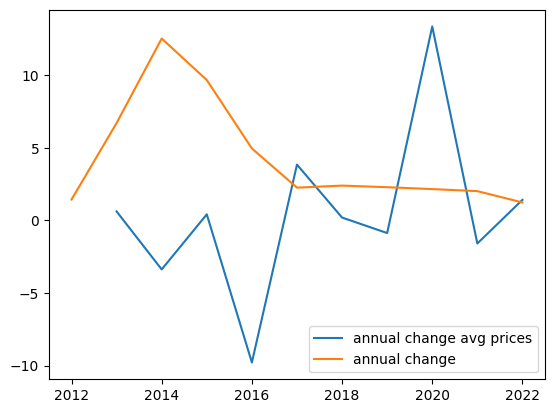

In [266]:
x=population_df['year']
y=population_df['annual_change_avg_prices']
y2=population_df['annual_change']
plt.plot(x,y,label="annual change avg prices")
plt.plot(x,y2,label="annual change")
plt.legend()


# the effect of ramdan

<AxesSubplot: xlabel='month', ylabel='year'>

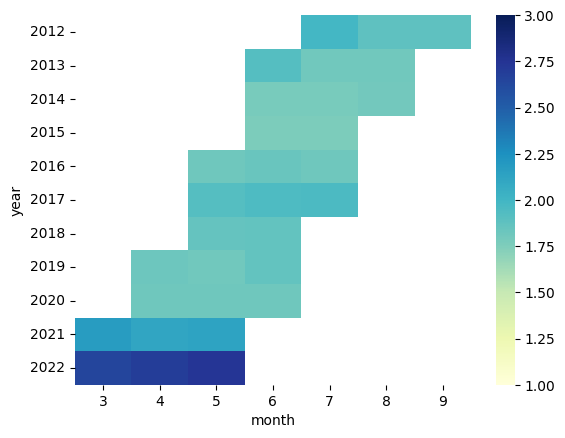

In [267]:
# create sample data
data =df[(df['is_ramdan'])& (df['commodity']=='Oil (vegetable)')]
table = pd.pivot_table(data, values='price', index='year', columns='month')

# create heat map
sns.heatmap(table, cmap='YlGnBu', annot=False, fmt='g',vmin=1,vmax=3)

# avg prices for diffrent commodity


In [269]:
df[df['year']==2014].groupby('commodity')['price'].mean()

commodity
Apples (red)               2.299167
Bananas                    0.860833
Beans (fava, dry)          1.545833
Bread (pita)               0.170000
Cheese (white, boiled)     5.251667
Chickpeas                  1.759167
Cucumbers                  0.639167
Eggs                       3.243333
Garlic                     1.919167
Lentils                    1.187500
Meat (beef)                9.532500
Meat (chicken)             2.264167
Meat (chicken, whole)      1.767500
Meat (lamb)               11.740000
Milk (pasteurized)         1.155833
Oil (olive)                4.920000
Oil (vegetable)            1.788333
Onions                     0.598333
Oranges (big size)         1.069000
Potatoes                   0.748333
Rice (imported)            1.208333
Sugar                      0.728333
Tomatoes                   0.566667
Name: price, dtype: float64

In [270]:
df[df['year']==2022].groupby('commodity')['price'].mean()

commodity
Apples (red)              1.387153
Bananas                   0.875152
Beans (fava, dry)         1.515694
Bread (pita)              0.323125
Bulgur                    0.896597
Cheese (picon)            0.774028
Cheese (white, boiled)    5.728819
Chickpeas                 1.863750
Cucumbers                 0.577500
Eggs                      2.655972
Fish (tuna, canned)       1.117361
Fuel (diesel)             0.719167
Fuel (gas)                7.000000
Fuel (kerosene)           0.715833
Fuel (petrol-gasoline)    0.904167
Garlic                    3.186806
Lentils                   1.262847
Meat (beef)               8.508403
Meat (chicken)            2.210486
Meat (chicken, whole)     1.542639
Meat (lamb)               9.980625
Milk (pasteurized)        1.097361
Milk (powder)             3.916111
Oil (olive)               6.338125
Oil (vegetable)           2.648819
Onions                    0.547014
Oranges (big size)        1.257087
Pasta                     0.362431
Potatoes  

In [272]:
df[df['category']=='non-food'].groupby('month')['price'].mean()

month
1     2.546087
2     2.602210
3     2.550870
4     2.546957
5     2.553043
6     2.574783
7     2.584710
8     2.591739
9     2.594348
10    2.598261
11    2.603478
12    2.602174
Name: price, dtype: float64

(0.0, 1.0)

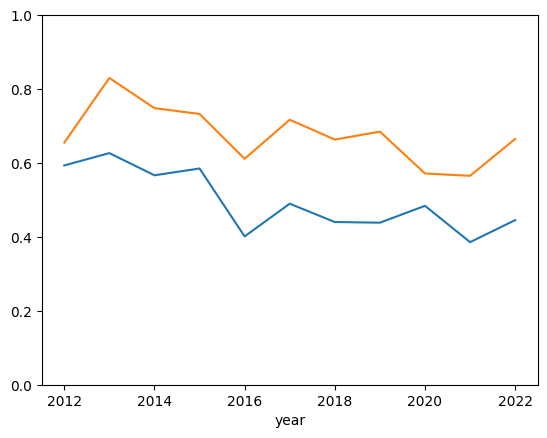

In [273]:
df[df['commodity']=='Tomatoes'].groupby('year')['price'].mean().plot()
df[df['commodity']=='Potatoes'].groupby('year')['price'].mean().plot()
plt.ylim([0,1])

<AxesSubplot: xlabel='year'>

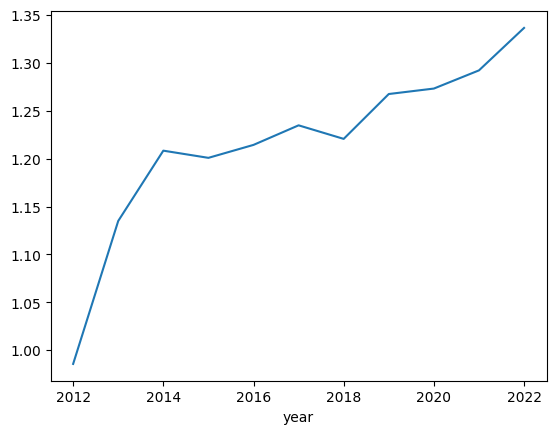

In [275]:
df[df['commodity']=='Rice (imported)'].groupby('year')['price'].mean().plot(x='year',y='price')

In [276]:
df[df['commodity']=='Oil (vegetable)'][df['market']=='Amman'][df.year==2022][['month','price']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2035138417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']=='Amman'][df.year==2022][['month','price']]


,month,price
26145,1,2.32
26557,2,2.32
26972,3,2.65
27391,4,2.68
27810,5,2.74
28228,6,2.74
28644,7,2.77
29058,8,2.77
29471,9,2.78
29884,10,2.79


In [277]:
avg=df[df['commodity']=='Oil (vegetable)'].groupby('month')['price'].mean().reset_index(name="avg_price")
avg

,month,avg_price
0,1,1.903377
1,2,1.918052
2,3,2.024805
3,4,2.026883
4,5,2.026364
5,6,2.026705
6,7,2.043766
7,8,2.047013
8,9,2.047922
9,10,2.048312


# data exploration

In [271]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==202

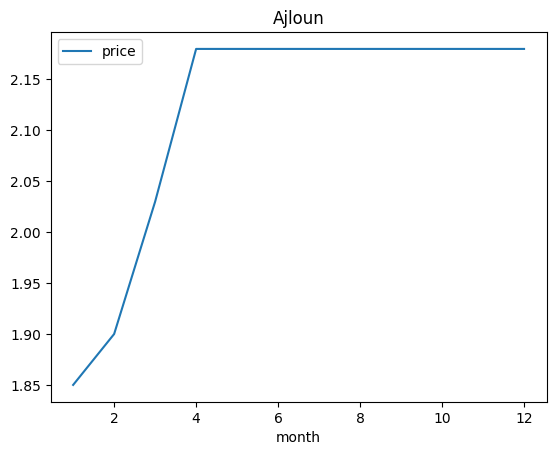

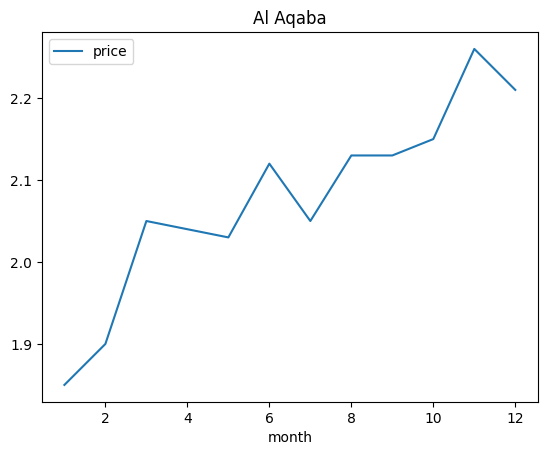

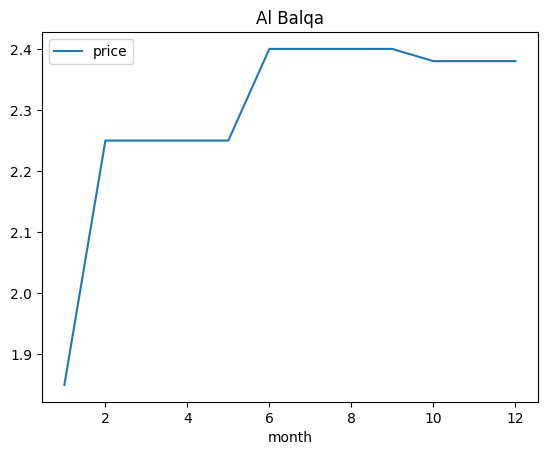

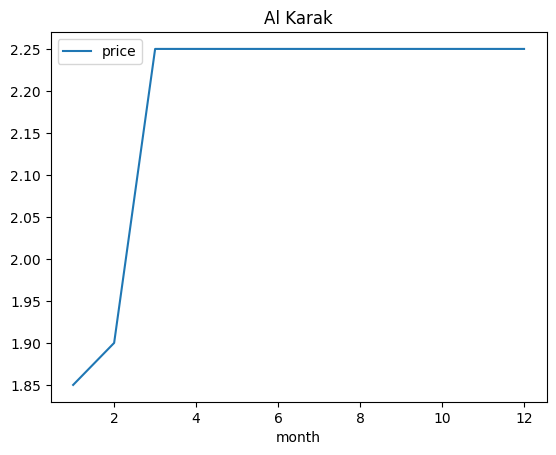

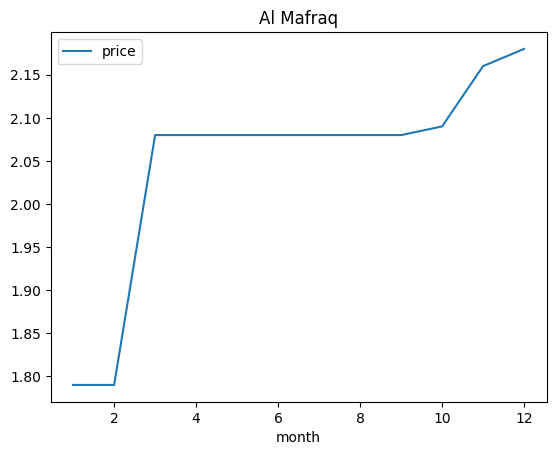

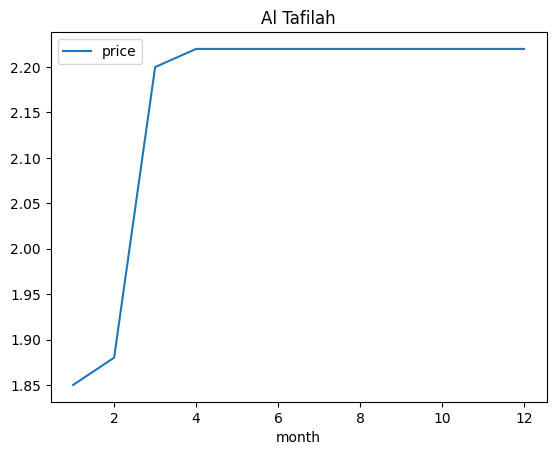

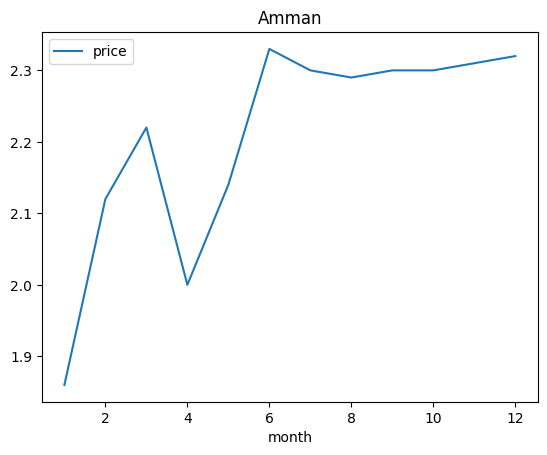

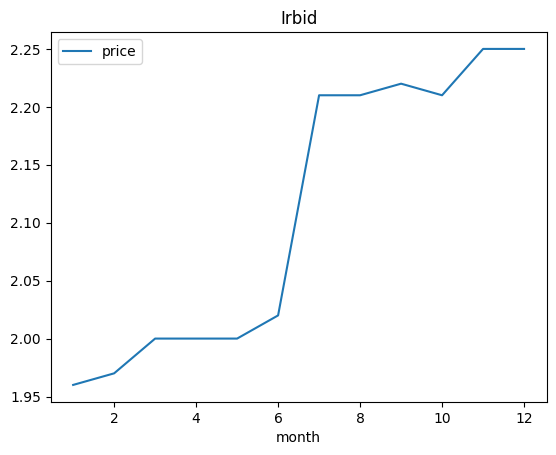

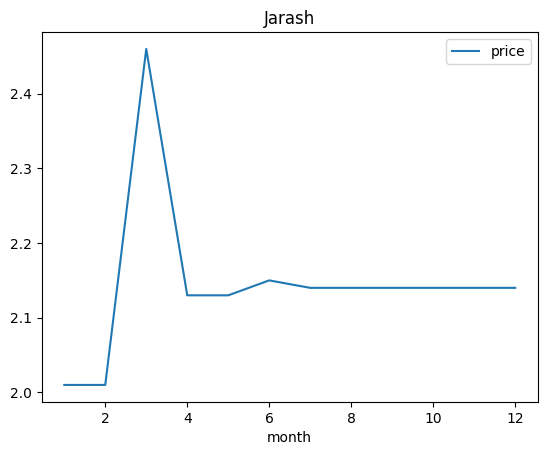

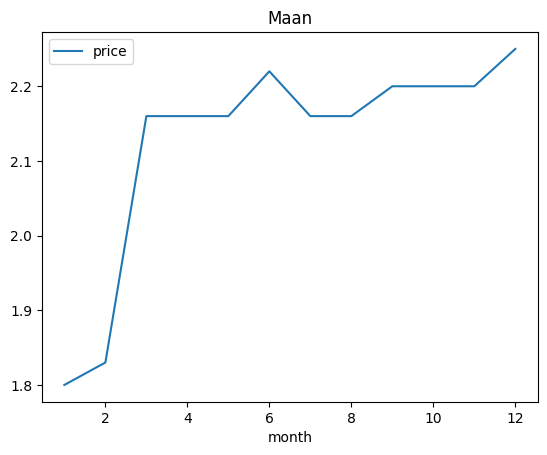

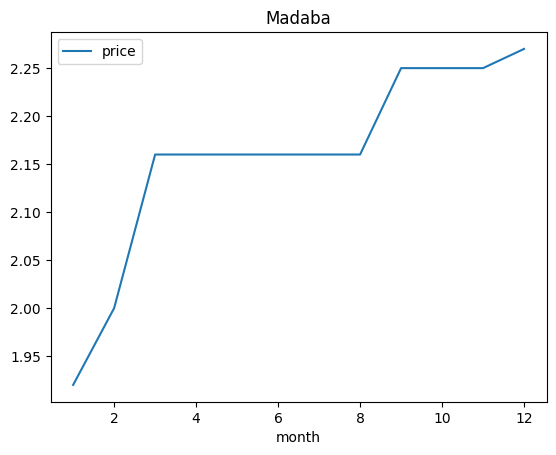

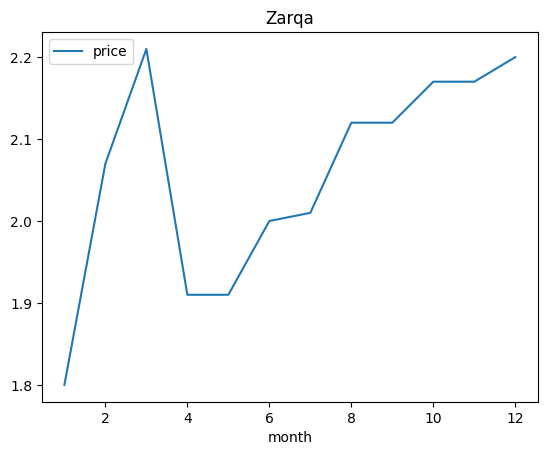

In [274]:
for i in df['market'].unique()[1:]:
    df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
    plt.title(i)
    plt.xticks()
    #plt.xlim([0,13])
    #plt.ylim([0,3])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\

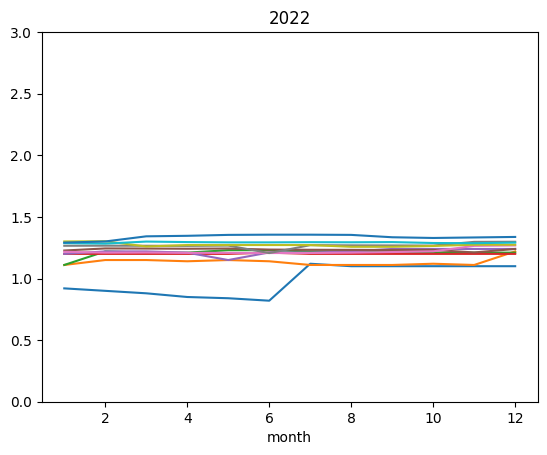

In [278]:
for i in df['year'].unique():
    df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
    plt.title(i)
    plt.ylim([0,3])
    

In [279]:
df.isna().sum()

market       0
category     0
commodity    0
unit         0
price        0
month        0
year         0
H-month      0
is_ramdan    0
dtype: int64

In [280]:
df['market'].value_counts()


Al Karak            2498
Amman               2498
Irbid               2494
Al Mafraq           2482
Ajloun              2481
Zarqa               2480
Jarash              2477
Al Balqa            2475
Madaba              2452
Al Tafilah          2439
Maan                2436
Al Aqaba            2376
National Average    1266
Name: market, dtype: int64

In [281]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

In [282]:
df['commodity'].value_counts()


Fuel (petrol-gasoline)    1008
Fuel (kerosene)           1008
Fuel (gas)                1008
Bread (pita)               935
Oil (vegetable)            935
Rice (imported)            934
Sugar                      929
Tomatoes                   929
Garlic                     929
Cucumbers                  929
Chickpeas                  929
Oil (olive)                929
Beans (fava, dry)          929
Meat (lamb)                929
Meat (chicken, whole)      929
Eggs                       929
Potatoes                   929
Onions                     928
Meat (beef)                928
Apples (red)               926
Cheese (white, boiled)     925
Milk (pasteurized)         923
Meat (chicken)             895
Pasta                      879
Lentils                    879
Cheese (picon)             879
Bulgur                     879
Salt (iodised)             864
Bananas                    862
Fish (tuna, canned)        840
Spinach                    822
Milk (powder)              756
Wheat fl

In [283]:
df['unit'].value_counts()


KG         18987
L           4103
12.5 KG     1008
1.8 L        935
2 KG         929
300 G        875
160 G        875
750 G        864
170 G        840
0.8 KG       756
1.5 KG       682
Name: unit, dtype: int64

In [284]:
df['price'].describe()

count    30854.000000
mean         2.124045
std          2.439454
min          0.150000
25%          0.660000
50%          1.130000
75%          2.250000
max         15.300000
Name: price, dtype: float64